243


,GDP
Date,
1959-06-30,3194.429
1959-09-30,3196.683
1959-12-31,3205.790
1960-03-31,3277.847
1960-06-30,3260.177
...,...
2018-12-31,18721.281
2019-03-29,18833.195
2019-06-28,18982.528


<Axes: xlabel='Date'>

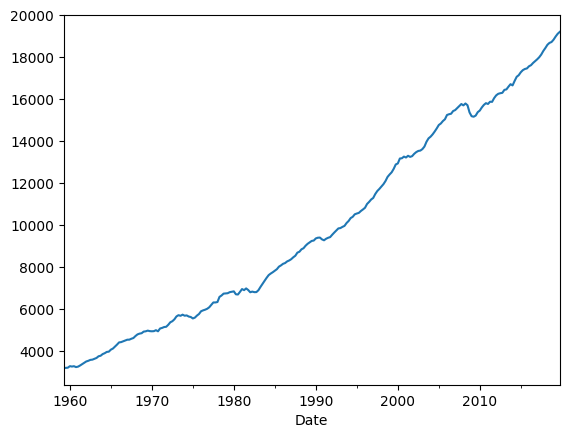

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot 
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
from patsy import dmatrices

# load dataset
GDP_raw = read_csv(r"C:\Users\zhouq\OneDrive - Nanyang Technological University\FYP\Codes\FYP\quarter.txt", header = 0, sep = ",", index_col=0, parse_dates=True, dayfirst=True)
GDP_raw = GDP_raw[1:244]
print(GDP_raw.size)
display(GDP_raw)
# plot dataset
GDP_raw['GDP'].plot()



Text(0.5, 1.0, 'dlog(GDP)')

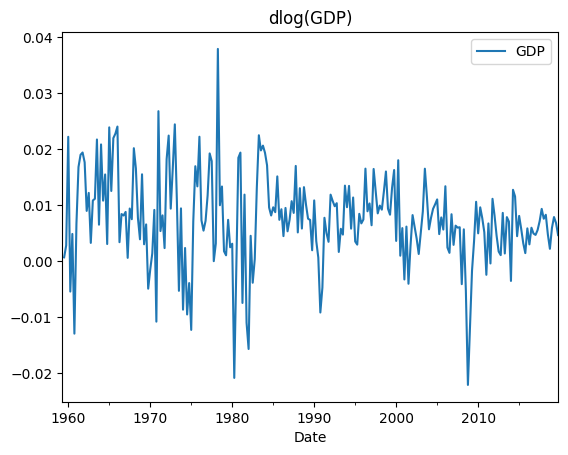

In [2]:
# transform data: take difference on log data
GDP_transform = pd.DataFrame(index=GDP_raw.index.copy())
GDP_transform = pd.DataFrame(data=GDP_raw['GDP'].apply(lambda x: math.log(x)))
GDP_transform = GDP_transform.diff()
# GDP_transform.to_csv('GDP_transform.txt', sep='\t', index=True)
GDP_transform.plot()
pyplot.title("dlog(GDP)") 

P-value:  5.4010828338042327e-11


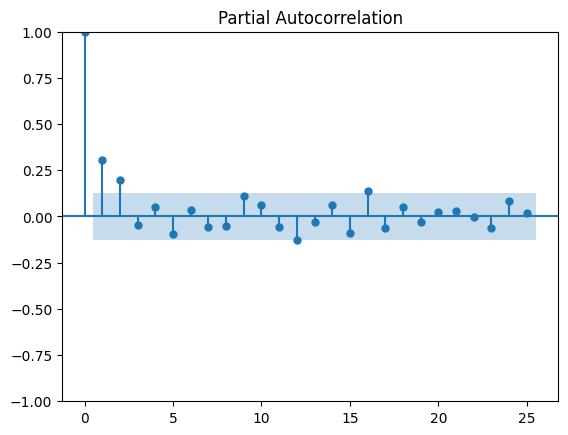

In [3]:
from statsmodels.tsa.stattools import adfuller
df_stationarityTest = adfuller(GDP_transform[1:], autolag='AIC')
print("P-value: ", df_stationarityTest[1])
# reject null hypothesis and series is stationary

from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(GDP_transform[1:], lags=25)
# suggesting AR(2) model

In [7]:
X = GDP_transform.values
model1 = AutoReg(X[1:250], lags=3)
res = model1.fit()
print(res.summary())

import statsmodels.api as sm
print(res.summary().as_latex())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  242
Model:                     AutoReg(3)   Log Likelihood                 830.293
Method:               Conditional MLE   S.D. of innovations              0.007
Date:                Wed, 17 Jan 2024   AIC                          -1650.587
Time:                        20:55:08   BIC                          -1633.204
Sample:                             3   HQIC                         -1643.582
                                  242                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.001      5.424      0.000       0.003       0.006
y.L1           0.2558      0.064      4.002      0.000       0.131       0.381
y.L2           0.2147      0.065      3.326      0.0

In [8]:
# split dataset
train, test = X[1:int(len(X)*0.8)], X[int(len(X)*0.8)+1:]
print(int(len(X)*0.8))
# train autoregression
model = AutoReg(train, lags=2)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


194
Coefficients: [0.00503697 0.20405395 0.19115993]


array([0.00804008, 0.00815161, 0.00823728, 0.00827608, 0.00830037,
       0.00831275, 0.00831991, 0.00832374, 0.00832589, 0.00832707,
       0.00832772, 0.00832807, 0.00832827, 0.00832838, 0.00832844,
       0.00832847, 0.00832849, 0.0083285 , 0.0083285 , 0.00832851,
       0.00832851, 0.00832851, 0.00832851, 0.00832851, 0.00832851,
       0.00832851, 0.00832851, 0.00832851, 0.00832851, 0.00832851,
       0.00832851, 0.00832851, 0.00832851, 0.00832851, 0.00832851,
       0.00832851, 0.00832851, 0.00832851, 0.00832851, 0.00832851,
       0.00832851, 0.00832851, 0.00832851, 0.00832851, 0.00832851,
       0.00832851, 0.00832851, 0.00832851])

array([[-0.00408262],
       [ 0.00570664],
       [-0.00528286],
       [-0.02207279],
       [-0.0117257 ],
       [-0.00169382],
       [ 0.00361277],
       [ 0.010623  ],
       [ 0.00498807],
       [ 0.00963052],
       [ 0.00770171],
       [ 0.0051825 ],
       [-0.00241207],
       [ 0.00675762],
       [-0.00038775],
       [ 0.01115434],
       [ 0.00814596],
       [ 0.00454824],
       [ 0.0017473 ],
       [ 0.00109778],
       [ 0.00864046],
       [ 0.00139288],
       [ 0.00788536],
       [ 0.00708654],
       [-0.00350724],
       [ 0.01275954],
       [ 0.01158228],
       [ 0.00447988],
       [ 0.00810024],
       [ 0.00578326],
       [ 0.00322851],
       [ 0.00146128],
       [ 0.00587451],
       [ 0.00301933],
       [ 0.00599316],
       [ 0.00495658],
       [ 0.00470821],
       [ 0.00558204],
       [ 0.00716576],
       [ 0.00936006],
       [ 0.00759959],
       [ 0.00830453],
       [ 0.00480795],
       [ 0.00222893],
       [ 0.00596011],
       [ 0

RMSE is 0.007332239878762849


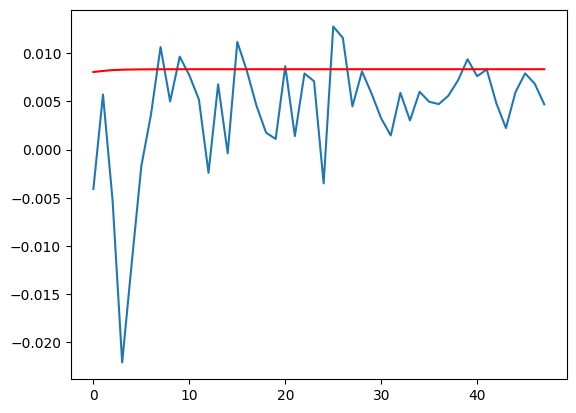

In [15]:
# Predict future values
y_pred = model_fit.predict(195, len(X)-1)
display(y_pred)
y_true = test
display(test)
mse = mean_squared_error(y_true, y_pred)
print('RMSE is',sqrt(mse))

# Plot
pyplot.plot(y_true)
pyplot.plot(y_pred, color='red')
pyplot.show()